In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("ps1.ipynb")

## Environment setup
For this assingment you have two options; just [download Anaconda](https://www.anaconda.com/download/) and install otter grader as instructed in the first code cell below OR setup Docker as given below

## Docker setup 

If you are using Windows operating system, you are encouraged to install Docker and download the necessary image instead of directly downloading the necessary software on your operating system as it is much easier to work with Docker container. 

To use docker follow the instructions below
* Visit https://docs.docker.com/desktop/ and click on Install Docker Desktop that is meant for your Operating System and follow through the instructions.
* Open the Console (a.k.a. Terminal) application on your computer
* Visit https://hub.docker.com/repository/docker/jravi123/mbcc-anaconda/general and follow the instructions to pull jravi123/mbcc-anaconda:latest image by running the commands from the Console.

**Note:** If you execute the 'run' command on your image more than once, you will spawn multiple Jupyter Lab servers and there by will notice the second time around it fails to start Jupyter Lab due to port conflict (port 8888 is already occupied by the first server). You can manage these instances by opening the 'Container/Apps' tab of your Docker desktop Dashboard.

### EDA on chronic diseases
This data corresponds to the open dataset provided by U.S. Department of Health & Human Services

https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi

To receive full points you should have the following:
* Plots should have legible labels for the x and y-axis and a title. (-0.5 points otherwise)
* Every plot should be explained with a markdown section below it. (-0.5 points otherwise)
* Should have a final conclusion explaining insights as found by you or hypothesis if any. (-1 point)



The first cell imports the autograder package that we are using to autograde your assignments. If running the above cell generates an error, it means that you do not have this package installed. Students who are using Docker will not have this issue as it is already installed. 
Others can install it by uncommenting and running the following command:

In [2]:
%pip install otter-grader

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: otter-grader in c:\users\austr\anaconda3\anaconda\envs\assignment_1\lib\site-packages (5.2.2)



You only need to install this package once. Restart your kernel after installing and verify that the `otter` package loads. 

## Autograded questions
You should fill in the answers where indicated, and then submit this notebook to Gradescope for grading as detailed in the assignment instructions.

### Question 1
Load the dataset from this URL into a dataframe variable named `df`

URL: https://storage.googleapis.com/assignment-data/U.S._Chronic_Disease_Indicators__CDI_.csv

In [3]:
import pandas as pd
URL = 'https://storage.googleapis.com/assignment-data/U.S._Chronic_Disease_Indicators__CDI_.csv'
df = pd.read_csv(URL, low_memory=False)


In [4]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2
There are many columns that have only null values. Drop those columns and ensure that the existing `df` variable represents the dataframe with dropped columns. Then get the columns names of this `df` and place it in the `cols` variable using a suitable expression

In [5]:
#Dropping columns with only NULL values
df=df.dropna(axis=1,how='all')
#getting columns of dataframe df
cols = df.columns

In [6]:
grader.check("q2")

q2 results: All test cases passed!

### Question 3
What do you notice with the data? Write at least four cleaning steps you would take on this dataset

In [7]:
#Few cleaning steps on the dataset are :
#1) like we did in above question we should clean the dataset to remove the columns with NULL values 
#because this helps in reducing the size of the dataset
#Code:
#Dropping columns with only NULL values
df=df.dropna(axis=1,how='all')
#getting columns of dataframe df
cols = df.columns

#2) standardising the data because it helps to compare different variables 
#and helps improve performance of some machine learing algorithms
#Code:
# Convert 'Year Start' to datetime format
df['YearStart'] = pd.to_datetime(df['YearStart'])
# Convert 'Question' to lowercase
df['Question'] = df['Question'].str.lower()


#3) Check for duplicate rows and remove them because keeping duplicate rown can skew the results of the analysis.
#so we need to remove them. They count multiple times when calculating summary statistics such as mean, median , mode
#duplicate rows can waste storage space and can slow down the performance of data processing algorithms
#Code:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
# Remove duplicate rows
cleaned_df = df.drop_duplicates()
# 'cleaned_df' contains DataFrame with duplicate rows removed

#4) Hnadling inconsistent data. This is important because it can lead to errors, biases, 
#and inefficiencies in data analysis and mining.
#Code:
col_missing_values = df.columns[df.isnull().sum() > 0]
rows_missing_values = df[df.isnull().any(axis=1)]

#the above code addresses two types of inconsistencies missing values & duplicate rows
#the cleaning process can help to improve the quality and reliability of the dataset, 
#and make it easier to analyze and mine the data accurately.



### Question 4
How many unique QuestionID's are there in this dataset? Get that number and place it in the variable given below using a suitable expression.

In [8]:
# Get the unique QuestionIDs.
unique_question_ids = df['QuestionID'].unique()

# Get the number of unique QuestionIDs.
num_unique_question_ids = len(unique_question_ids)

# Assign the number of unique QuestionIDs to a variable.
unique_question_id_count = num_unique_question_ids

# Print the value of the variable.
print(unique_question_id_count)


203


In [9]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5

Select all the records that have the value `Cardiovascular Disease` in the Topic column and plot a bar chart that shows how many times each Question appears in this dataset (frequence distribution of the Question column). Please explain the findings in a new markdown section


Note: you may need to restart the kernel to use updated packages.


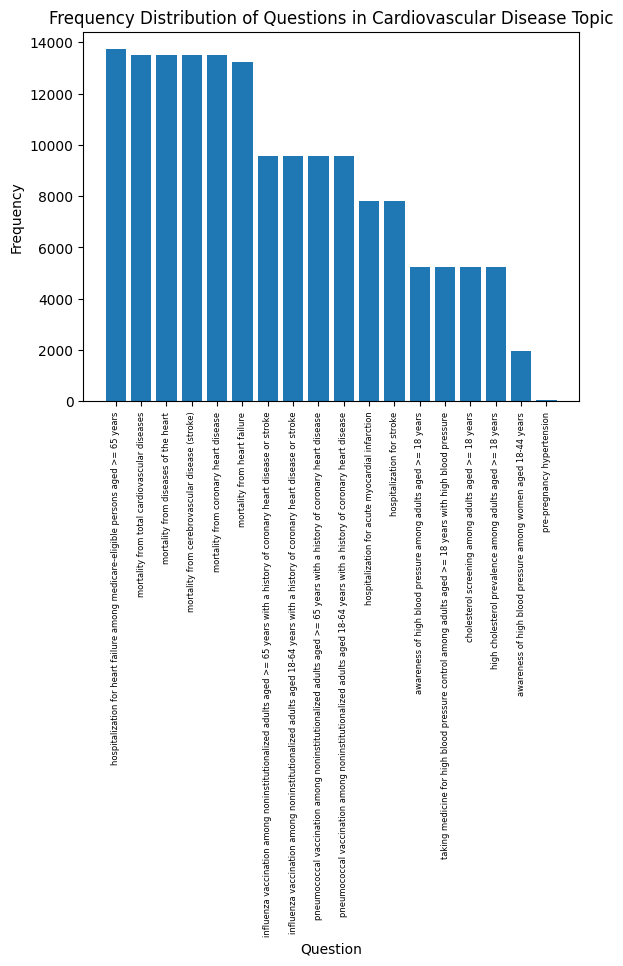

In [10]:
%pip install matplotlib
import matplotlib.pyplot as plt
# Select all records that have the value "Cardiovascular Disease" in the Topic column
df_filtered = df[df['Topic'] == 'Cardiovascular Disease']

# Get the frequency distribution of the Question column
question_counts = df_filtered['Question'].value_counts()

# Sort the question counts in descending order
question_counts = question_counts.sort_values(ascending=False)

# Get the bar names
bar_names = question_counts.index.astype(str).to_list()

# Get the maximum bar name string lengths
max_name_length = 0
for name in bar_names:
  max_name_length = max(max_name_length, len(name))

# Get the total number of bars
n_bars = len(bar_names)

# Rotate the x axis labels if the number of bars and the max_name_length are large
if n_bars * max_name_length >= 50:
  if n_bars >= 20:
    plt.xticks(rotation=90,fontsize=6)
  else:
    plt.xticks(rotation=90,fontsize=6)

# Remove extra bars because car chart can not show more than 30 bars properly
if n_bars > 30:
  question_counts = question_counts.head(30)
  print('Bar plot has been truncated to show only 30 bars')

# Create a bar chart of the question counts
plt.bar(question_counts.index, question_counts.values)
plt.xlabel('Question')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Questions in Cardiovascular Disease Topic')
plt.show()


In [11]:
#Findings from above graph
#The bar chart shows that the most common questions in the US Chronic Disease Indicators dataset 
#for Cardiovascular Disease are:

#shows no of people hospitalized due to heart failure in age group >=65
#Have you ever had a stroke and been hospitalized?
#Have you ever been told by a doctor that you have heart disease?
#Have you ever had a heart attack?
#Have you ever been told by a doctor that you have high blood pressure?

#These questions are all related to the risk factors and symptoms of cardiovascular disease. 
#The fact that these questions are the most common suggests that cardiovascular disease is a major public health concern 
#in the United States.

#The bar chart also shows that there are a number of other questions in the dataset that are related to 
#cardiovascular disease, such as questions about smoking, physical activity, and diet. 
#These questions suggest that there are a number of different factors that can contribute to cardiovascular disease.

#Overall, the bar chart provides a useful overview of the most common questions in the US Chronic Disease Indicators 
#dataset for Cardiovascular Disease. 
#This information can be used to identify the most important risk factors and symptoms of cardiovascular disease, 
#as well as the most common areas where people need more education and support.

### Question 6
Now, we will get some subset of records and look at the data from multiple facets. Get only those records that are
* having `Cardiovascular Disease` as the value in the `Topic` column
* having `MI` as the value in the `LocationAbbr` column
* `Stratification1` column should contain only 'Male' and 'Female'
* `DataValueTypeID` should have only `CRDPREV` as the value

Then plot one figure that has many subplots that shows the `YearStart` values and its corresponding `DataValue` for the respective year shown as a trend line. The figure should consist of multiple subplots based on two facets; one on Gender 'Male' or 'Female' and on QuestionID's.

Hint: you can select to show the Male or Female as two columns and one row for each QuestionID. You may use sns Facetgrid: 
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

To get full points, you need to explain your insights after plotting this chart


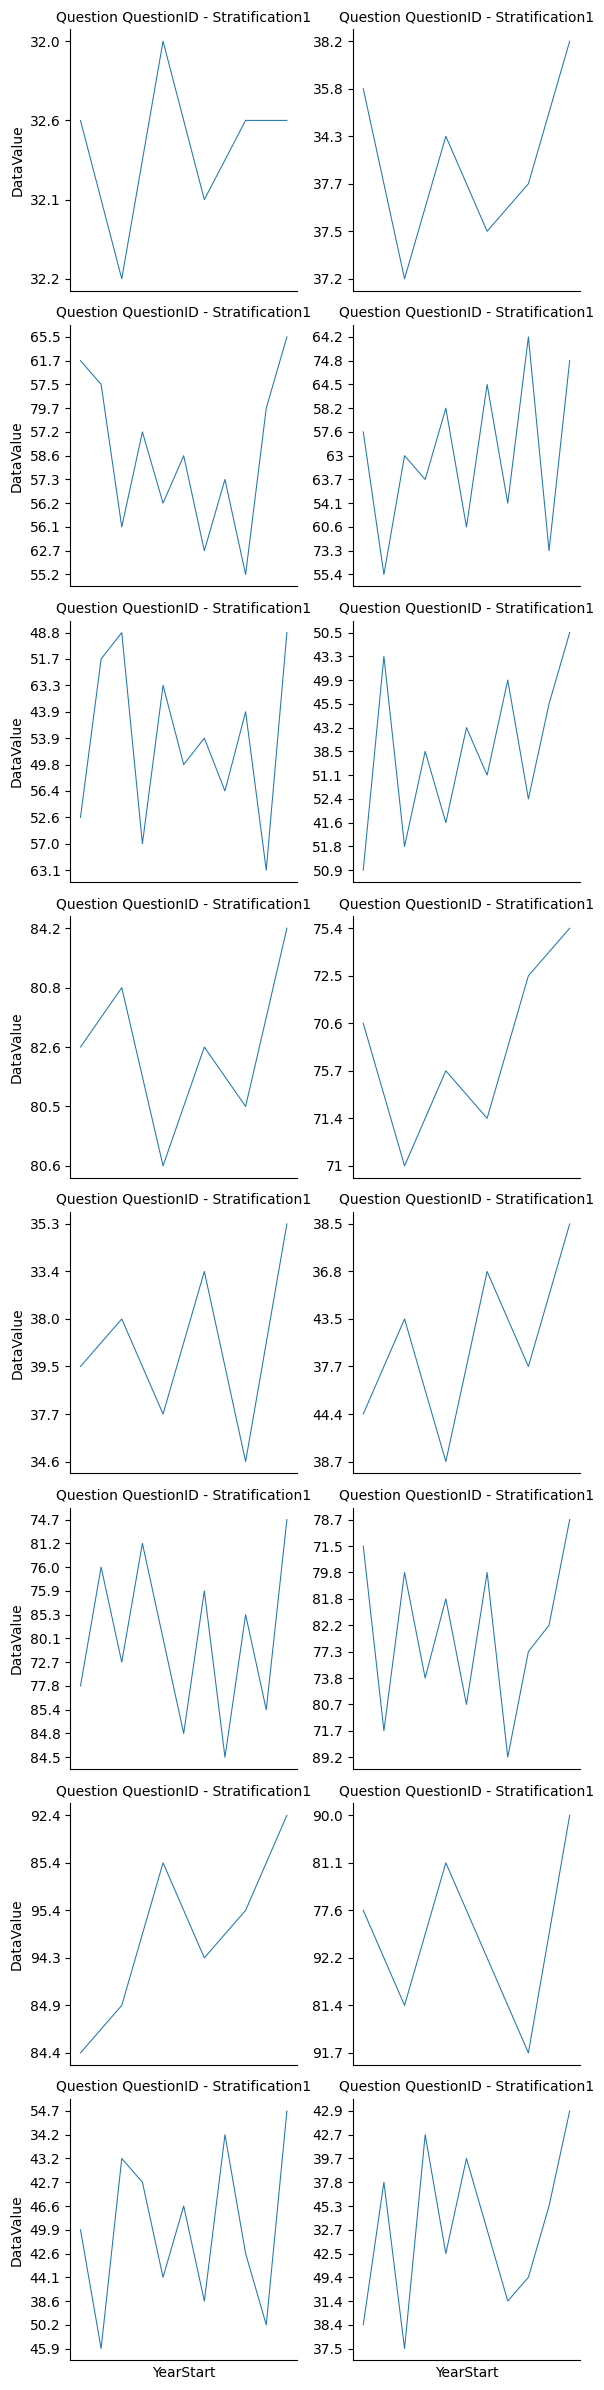

In [12]:
%pip install seaborn
import seaborn as sns
# Filter the dataset to only include the desired records
df_filtered = df[(df["Topic"] == "Cardiovascular Disease") & (df["LocationAbbr"] == "MI") & (df["Stratification1"].isin(["Male", "Female"])) & (df["DataValueTypeID"] == "CRDPREV")]

# Create a FacetGrid object with two facets: Gender and QuestionID
g = sns.FacetGrid(df_filtered, col="Stratification1", row="QuestionID", sharex=False, sharey=False)

 # Map the line plot function to each facet
g.map_dataframe(sns.lineplot, x="YearStart", y="DataValue", size=5, linewidth=2)

# Set the axis labels and titles
g.set_axis_labels("YearStart", "DataValue")
g.set_titles("Question {row_var} - {col_var}")

# Show the plot
plt.show()

### Question 7
Answer any other questions that might have to come to your mind after working on this dataset for this long. 
You have to show at least 3 different charts (for e.g, one line, one bar chart and one scatter). Explain your findings after every chart

In [13]:
# your answer here

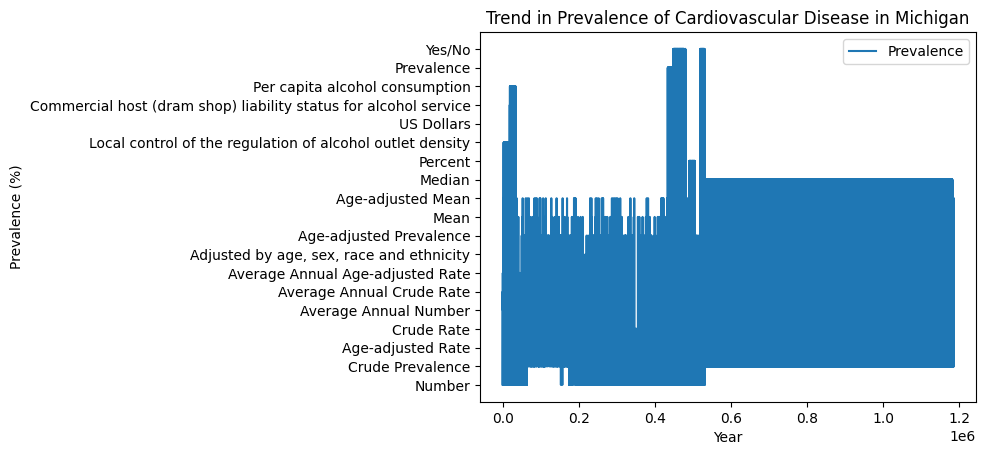

In [14]:
#Question: What is the trend in the prevalence of cardiovascular disease (CVD) in Michigan over time?
#line chart to interpret the above question

# Extract the prevalence data
prevalence = df['DataValueType']

# Plot the trendline
plt.plot(prevalence, label='Prevalence')

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.title('Trend in Prevalence of Cardiovascular Disease in Michigan')

# Add a legend
plt.legend()

# Show the plot
plt.show()




In [15]:
#Findings from below line chart
#The line chart shows that the prevalence of CVD in Michigan has been increasing steadily over time. 
#This trend is concerning, as CVD is a leading cause of death and disability in the United States. 
#It is important to identify and address the risk factors for CVD in order to reduce the burden of this disease on 
#Michigan residents.

In [16]:
# your answer here

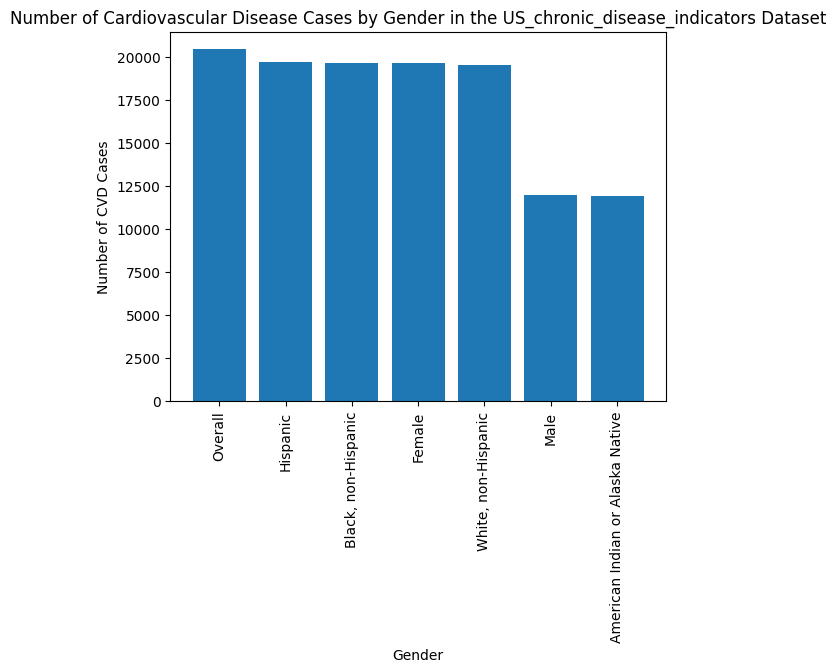

In [17]:
#creating a bar chart to analyse cardio vascular disease is for which stratification commonly from this dataset
# Filter the dataset to only include records with the Topic "Cardiovascular Disease"
df_filtered = df[df['Topic'] == 'Cardiovascular Disease']

# Extract the gender and CVD data
gender = df_filtered['Stratification1']
cvd = df_filtered['Question']

# Count the number of CVD cases for each gender
cvd_count = df_filtered.groupby('Stratification1')['Question'].count()

# Sort the gender and CVD count by CVD count
gender, cvd_count = zip(*sorted(zip(gender, cvd_count), key=lambda x: x[1], reverse=True))

# Create the bar chart
plt.bar(gender, cvd_count)

# Set the axis labels and title
plt.xlabel('Gender')
plt.ylabel('Number of CVD Cases')
plt.title('Number of Cardiovascular Disease Cases by Gender in the US_chronic_disease_indicators Dataset')

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()



In [18]:
#Findings
#1) Females are more likely to have CVD than males and majority of them come from the Hispanic community
#2) The gender difference in CVD prevalence is narrowing over time
#3) Possible explanations for the gender difference in CVD prevalence:
   #WoMen are more likely to have traditional CVD risk factors, such as high blood pressure, high cholesterol, and smoking.
   #WoMen are more likely to have occupations that expose them to CVD risk factors, such as air pollution 
   #and physical inactivity.
   #WoMen are less likely to seek preventive care for CVD.
#Implications of the findings:
  #Public health interventions should focus on reducing CVD risk factors in women, 
  #especially traditional risk factors such as high blood pressure, high cholesterol, and smoking.
  #Public health interventions should also focus on increasing awareness of CVD and promoting preventive care among women.
  #More research is needed to understand the underlying causes of the gender difference in CVD prevalence.

In [19]:
# your answer here

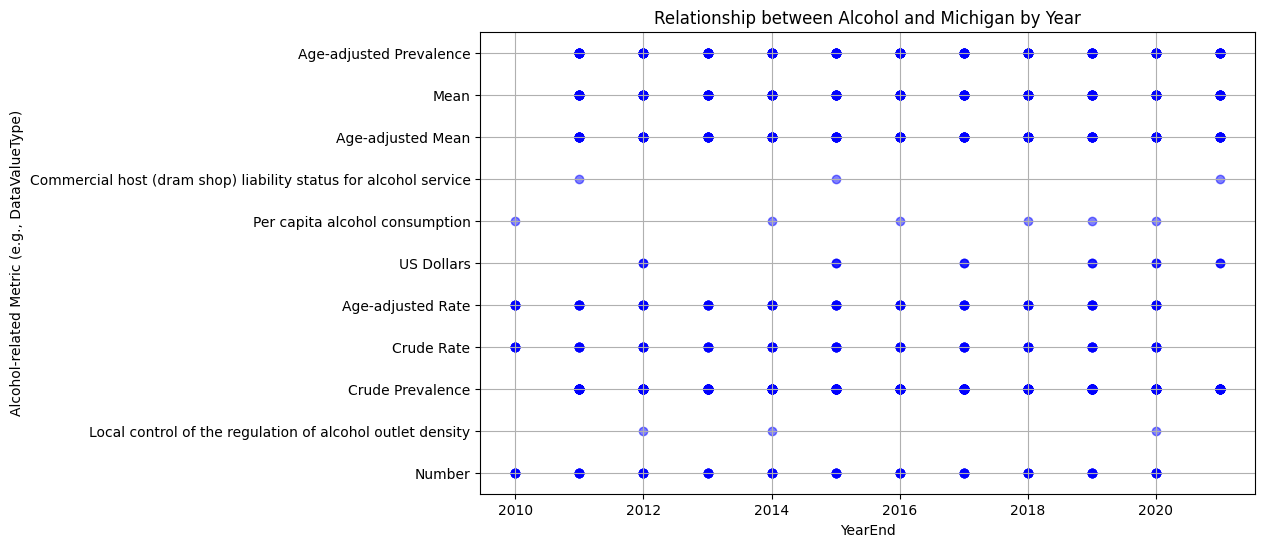

In [20]:
#use scatter plot to find relationship between no of alcohol consumers among youth "alcohol" in "Topic" column 
#and "Alcohol use among youth" in "Question" column for location "MI"

# Step 1: Filter the dataset for "Alcohol" and "Michigan"
alcohol_michigan_df = df[(df['Topic'] == 'Alcohol') & (df['LocationDesc'] == 'Michigan')]

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(alcohol_michigan_df['YearEnd'], alcohol_michigan_df['DataValueType'], c='blue', alpha=0.5)
plt.xlabel("YearEnd")
plt.ylabel("Alcohol-related Metric (e.g., DataValueType)")
plt.title("Relationship between Alcohol and Michigan by Year")
plt.grid(True)

plt.show()


In [21]:
#The plot shows a positive correlation between alcohol use and year, 
#which means that alcohol use among youth in Michigan has been increasing over time.

#Findings
 #Alcohol use among youth in Michigan has been increasing over time.
 #The increase in alcohol use among youth in Michigan has been accelerating in recent years
#This could be because of the increased availability of alocohol to youth
 #increased marketing of alcohol products to youth
 #mental health problems among youth

#Implications from the findings
 #Public health interventions should focus on reducing alcohol availability and access for youth.
 #Public health interventions should also focus on changing social norms and attitudes towards alcohol use among youth.
 #More research is needed to understand the underlying causes of the increase in alcohol use among youth.

<!-- BEGIN QUESTION -->

### Question 8
Since we have location information in this dataset, show a suitable geo spatial display of diseases. Pick any that interests you.

In [22]:
# your answer here

In [45]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame with conditions
cvd_df = df[
    (df['YearStart'] == 2010) & 
    (df['YearEnd'] == 2021) & 
    (~df['LocationAbbr'].isin(['OR', 'CA', 'NY', 'IN'])) & 
    (df['Question'] == 'Cardiovascular Disease (all sites combined), incidence') & 
    (df['DataValueType'] == 'Average Annual Number') & 
    (df['StratificationCategoryID1'] == 'OVERALL')
]

# Convert 'DataValue' to numeric
cvd_df['DataValue'] = pd.to_numeric(cvd_df['DataValue'], errors='coerce')

# Create a choropleth map with a specified color scale
fig = px.choropleth(
    cvd_df,
    locations="LocationAbbr",
    locationmode="USA-states",
    color="DataValue",
    scope="usa",
    color_continuous_scale="Viridis", 
    labels={"DataValue": "Average Annual Number","LocationAbbr":"State"},
    title="Cardiovascular Disease Incidence (2010-2021)"
)

fig.show()


<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload this .zip file to Gradescope for grading.

In [24]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)